In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("mobilesales.csv")
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [3]:
df.rename(columns={ 'fc': 'front_camera_mp', 'm_dep': 'mobile_depth_mm', 'mobile_wt': 'mobile_weight_g','n_cores': 'num_cores',
                    'pc': 'primary_camera_mp', 'px_height': 'pixel_height','px_width': 'pixel_width','sc_h': 'screen_height_mm',
                    'sc_w': 'screen_width_mm'}, inplace=True)

In [4]:
df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim',
       'front_camera_mp', 'four_g', 'int_memory', 'mobile_depth_mm',
       'mobile_weight_g', 'num_cores', 'primary_camera_mp', 'pixel_height',
       'pixel_width', 'ram', 'screen_height_mm', 'screen_width_mm',
       'talk_time', 'three_g', 'touch_screen', 'wifi'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   battery_power      1000 non-null   int64  
 2   blue               1000 non-null   int64  
 3   clock_speed        1000 non-null   float64
 4   dual_sim           1000 non-null   int64  
 5   front_camera_mp    1000 non-null   int64  
 6   four_g             1000 non-null   int64  
 7   int_memory         1000 non-null   int64  
 8   mobile_depth_mm    1000 non-null   float64
 9   mobile_weight_g    1000 non-null   int64  
 10  num_cores          1000 non-null   int64  
 11  primary_camera_mp  1000 non-null   int64  
 12  pixel_height       1000 non-null   int64  
 13  pixel_width        1000 non-null   int64  
 14  ram                1000 non-null   int64  
 15  screen_height_mm   1000 non-null   int64  
 16  screen_width_mm    1000 n

In [6]:
df.isnull().sum()

id                   0
battery_power        0
blue                 0
clock_speed          0
dual_sim             0
front_camera_mp      0
four_g               0
int_memory           0
mobile_depth_mm      0
mobile_weight_g      0
num_cores            0
primary_camera_mp    0
pixel_height         0
pixel_width          0
ram                  0
screen_height_mm     0
screen_width_mm      0
talk_time            0
three_g              0
touch_screen         0
wifi                 0
dtype: int64

In [7]:
df_new = df.drop(['id','screen_height_mm','screen_width_mm'],axis=1)

In [8]:
def classify_price_range(ram):
    if ram < 1500:
        return 0  # low
    elif ram <= 3000:
        return 1  # medium
    else:
        return 3  # high
df['price_range'] = df['ram'].apply(classify_price_range)

In [9]:
df_new.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,front_camera_mp,four_g,int_memory,mobile_depth_mm,mobile_weight_g,num_cores,primary_camera_mp,pixel_height,pixel_width,ram,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,20.000000,1.000000,1.00000,1.000000


In [10]:
cor = df_new.corr()
cor 

,battery_power,blue,clock_speed,dual_sim,front_camera_mp,four_g,int_memory,mobile_depth_mm,mobile_weight_g,num_cores,primary_camera_mp,pixel_height,pixel_width,ram,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,0.025732,0.012847,0.048647,0.053365,-0.032366,0.015546,3.151417e-02,-1.013784e-02,-0.000414
blue,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,0.003283,-0.025247,-0.058810,-0.032054,0.057570,-0.031995,1.352986e-02,-6.003074e-02,0.025568
clock_speed,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,-0.012247,0.047469,0.017277,0.070585,-0.000650,-0.078797,-2.140644e-02,6.189276e-02,-0.048593
dual_sim,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,-0.003129,0.073936,0.006842,0.015610,0.048171,0.004390,6.895838e-04,3.401967e-02,0.031545
front_camera_mp,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,0.020828,0.659338,-0.017982,0.030550,-0.051997,-0.051458,-1.112104e-02,1.546706e-02,-0.060373
four_g,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,0.066716,0.037669,0.033655,0.036545,0.030821,0.013692,5.535283e-01,-1.000338e-02,-0.035652
int_memory,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,0.021601,0.022682,-0.009564,-0.003877,-0.007107,0.023759,-1.592239e-02,2.218589e-02,0.011860
mobile_depth_mm,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,0.010062,0.012663,0.062559,0.034861,0.018349,0.024124,-2.927827e-02,4.025363e-02,-0.039705
mobile_weight_g,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,-0.038908,0.027343,0.011157,-0.014577,0.028786,-0.021704,6.261881e-03,4.452531e-02,0.069762
num_cores,0.025732,0.003283,-0.012247,-0.003129,0.020828,0.066716,0.021601,0.010062,-0.038908,1.000000,0.014376,-0.054433,-0.059388,-0.042750,-0.005640,5.093589e-02,-1.661558e-02,-0.007256


In [11]:
cor = cor.abs()
cor

,battery_power,blue,clock_speed,dual_sim,front_camera_mp,four_g,int_memory,mobile_depth_mm,mobile_weight_g,num_cores,primary_camera_mp,pixel_height,pixel_width,ram,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.046610,0.039075,0.061171,0.007846,0.042520,0.003751,0.009065,0.047065,0.025732,0.012847,0.048647,0.053365,0.032366,0.015546,3.151417e-02,1.013784e-02,0.000414
blue,0.046610,1.000000,0.034754,0.011100,0.056063,0.001169,0.012416,0.018319,0.023513,0.003283,0.025247,0.058810,0.032054,0.057570,0.031995,1.352986e-02,6.003074e-02,0.025568
clock_speed,0.039075,0.034754,1.000000,0.012423,0.010127,0.024665,0.030487,0.016995,0.014107,0.012247,0.047469,0.017277,0.070585,0.000650,0.078797,2.140644e-02,6.189276e-02,0.048593
dual_sim,0.061171,0.011100,0.012423,1.000000,0.057606,0.024907,0.012158,0.021760,0.001734,0.003129,0.073936,0.006842,0.015610,0.048171,0.004390,6.895838e-04,3.401967e-02,0.031545
front_camera_mp,0.007846,0.056063,0.010127,0.057606,1.000000,0.032832,0.006565,0.020859,0.018353,0.020828,0.659338,0.017982,0.030550,0.051997,0.051458,1.112104e-02,1.546706e-02,0.060373
four_g,0.042520,0.001169,0.024665,0.024907,0.032832,1.000000,0.037488,0.014806,0.000509,0.066716,0.037669,0.033655,0.036545,0.030821,0.013692,5.535283e-01,1.000338e-02,0.035652
int_memory,0.003751,0.012416,0.030487,0.012158,0.006565,0.037488,1.000000,0.004386,0.010447,0.021601,0.022682,0.009564,0.003877,0.007107,0.023759,1.592239e-02,2.218589e-02,0.011860
mobile_depth_mm,0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,0.004386,1.000000,0.041994,0.010062,0.012663,0.062559,0.034861,0.018349,0.024124,2.927827e-02,4.025363e-02,0.039705
mobile_weight_g,0.047065,0.023513,0.014107,0.001734,0.018353,0.000509,0.010447,0.041994,1.000000,0.038908,0.027343,0.011157,0.014577,0.028786,0.021704,6.261881e-03,4.452531e-02,0.069762
num_cores,0.025732,0.003283,0.012247,0.003129,0.020828,0.066716,0.021601,0.010062,0.038908,1.000000,0.014376,0.054433,0.059388,0.042750,0.005640,5.093589e-02,1.661558e-02,0.007256


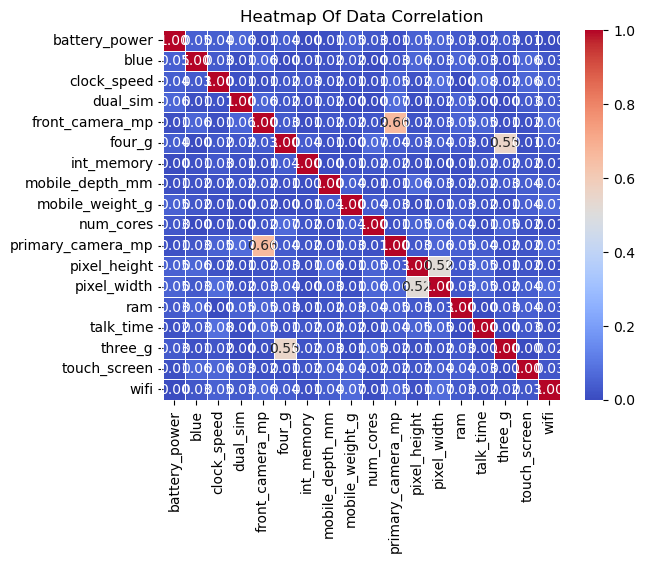

In [14]:
plt.Figure(figsize=(20,5))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Heatmap Of Data Correlation")
plt.show()

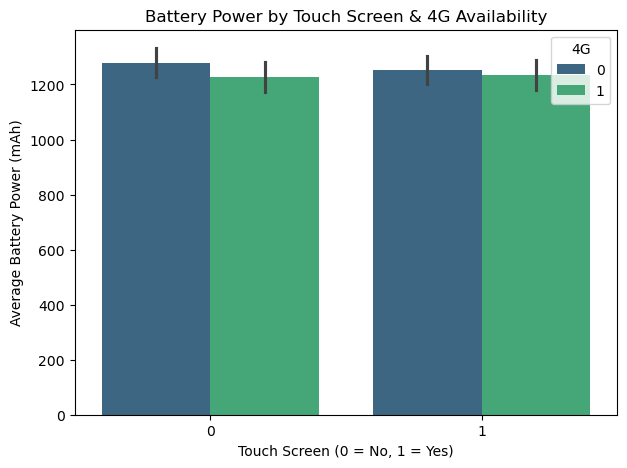

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x='touch_screen', y='battery_power', hue='four_g', data=df_new, palette='viridis')
plt.xlabel('Touch Screen (0 = No, 1 = Yes)')
plt.ylabel('Average Battery Power (mAh)')
plt.title('Battery Power by Touch Screen & 4G Availability')
plt.legend(title='4G')
plt.show()

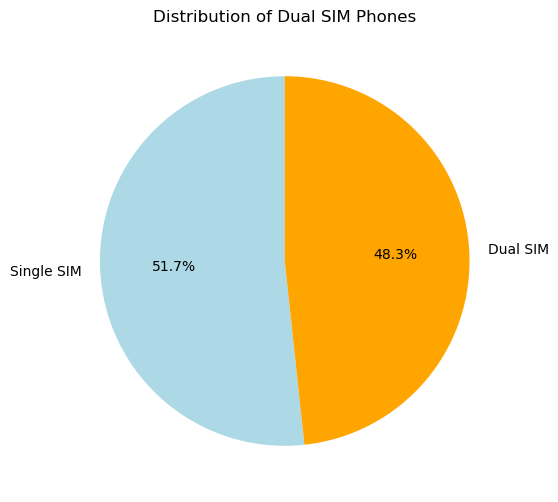

In [16]:
dual_sim_counts = df['dual_sim'].value_counts()
labels = ['Single SIM', 'Dual SIM']
colors = ['lightblue', 'orange']

plt.figure(figsize=(6,6))
plt.pie(dual_sim_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Dual SIM Phones')
plt.show()

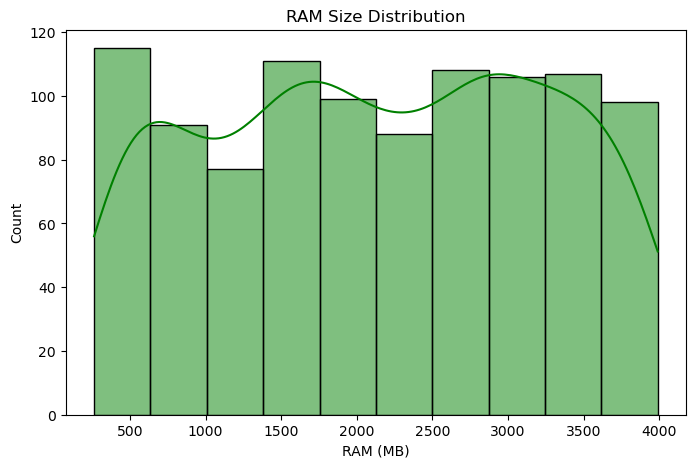

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df_new['ram'], bins=10, kde=True, color='green')
plt.xlabel('RAM (MB)')
plt.title('RAM Size Distribution')
plt.show()

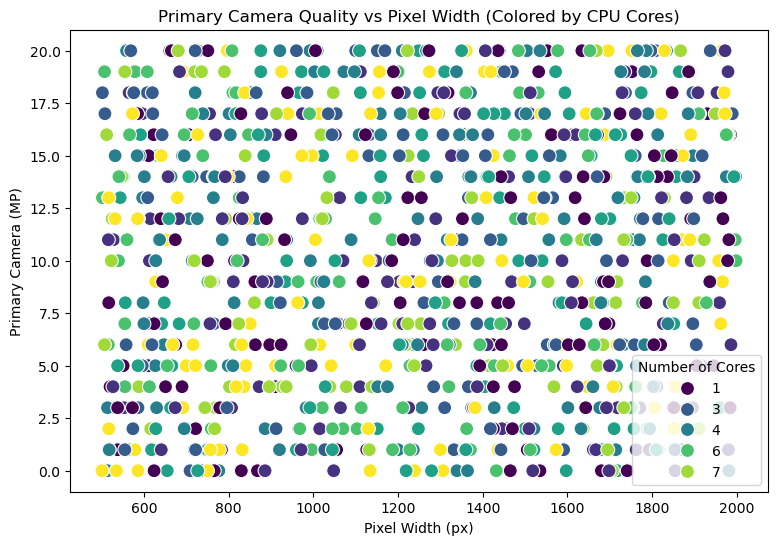

In [18]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='pixel_width',y='primary_camera_mp', hue='num_cores', data=df_new, palette='viridis', s=100)
plt.xlabel('Pixel Width (px)')
plt.ylabel('Primary Camera (MP)')
plt.title('Primary Camera Quality vs Pixel Width (Colored by CPU Cores)')
plt.legend(title='Number of Cores')
plt.show()

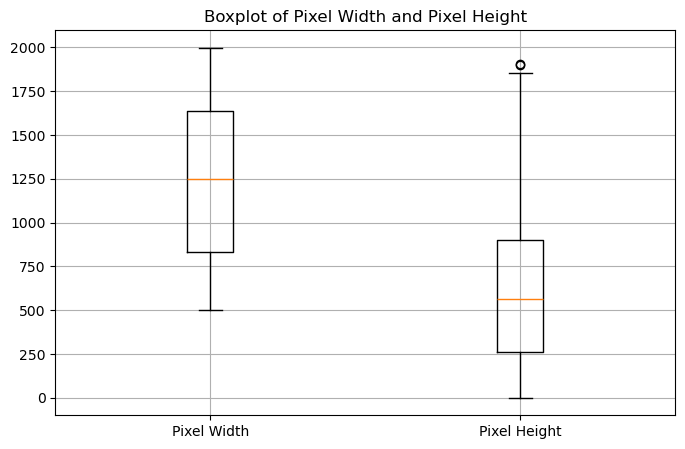

In [19]:
plt.figure(figsize=(8,5))
plt.boxplot([df_new['pixel_width'], df_new['pixel_height']])
plt.xticks([1, 2], ['Pixel Width', 'Pixel Height'])
plt.title('Boxplot of Pixel Width and Pixel Height')
plt.grid(True)
plt.show()

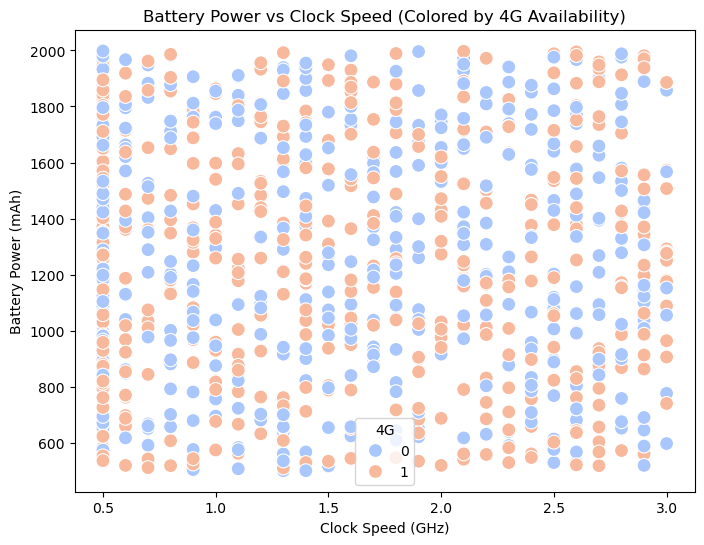

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='clock_speed', y='battery_power', hue='four_g', data=df_new, palette='coolwarm', s=100)
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Battery Power (mAh)')
plt.title('Battery Power vs Clock Speed (Colored by 4G Availability)')
plt.legend(title='4G')
plt.show()

In [22]:
selected_columns = ['ram', 'blue', 'four_g', 'dual_sim', 'touch_screen', 'price_range']
corr = df[selected_columns].corr()
corr = corr.abs()

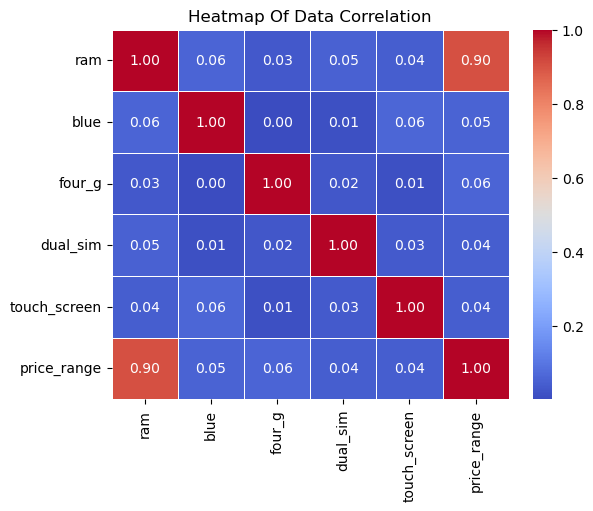

In [23]:
plt.Figure(figsize=(20,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Heatmap Of Data Correlation")
plt.show()

In [24]:
X = df[['ram','blue','four_g','dual_sim','touch_screen']]
Y = df['price_range']

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=22)

In [26]:
reg = LogisticRegression(max_iter=10000 )
reg.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [27]:
pred = reg.predict(X_test)
pred

array([1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 1, 1,
       1, 1, 3, 1, 0, 0, 1, 0, 0, 1, 3, 3, 3, 3, 3, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 3, 0, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 0, 1, 1, 1, 1, 3, 0,
       1, 1, 0, 3, 1, 1, 1, 3, 0, 1, 0, 0, 3, 3, 0, 3, 1, 1, 0, 1, 1, 1,
       3, 0, 3, 1, 0, 3, 0, 3, 1, 3, 3, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0,
       0, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 0, 1, 3, 3,
       0, 1, 0, 1, 0, 1, 3, 3, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 0, 3, 1, 3,
       3, 1, 3, 1, 0, 1, 3, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 1, 0, 3, 1, 0,
       0, 0, 1, 1, 0, 1, 3, 3, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       3, 1, 3, 1, 3, 0, 1, 3, 3, 1, 3, 3, 0, 0, 1, 1, 3, 1, 0, 0, 0, 0,
       3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 1,
       1, 1, 1, 0, 3, 0, 0, 1, 1, 3, 3, 3, 0, 3, 0,

In [28]:
score = reg.score(X_test,Y_test)
score

0.996969696969697

In [29]:
cm = confusion_matrix(Y_test,pred)
cm

array([[106,   0,   0],
       [  1, 137,   0],
       [  0,   0,  86]], dtype=int64)

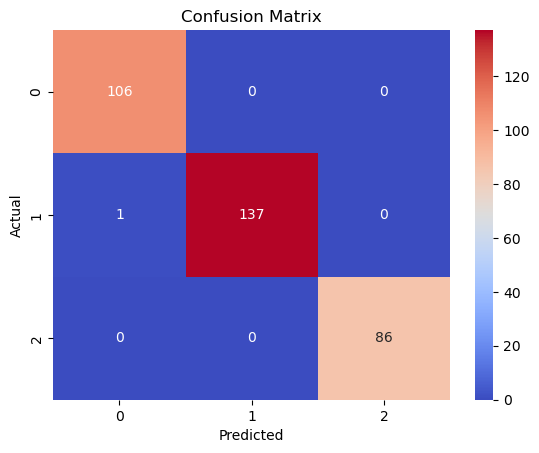

In [30]:
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## DecisionTreeClassifier

In [44]:
model_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [45]:
pred1 = model_tree.predict(X_test)
pred1

array([1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 1, 1,
       1, 1, 3, 1, 0, 0, 1, 0, 0, 1, 3, 3, 3, 3, 3, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 3, 0, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 0, 1, 1, 1, 1, 3, 0,
       1, 1, 0, 3, 1, 1, 1, 3, 0, 1, 0, 0, 3, 3, 0, 3, 1, 1, 0, 1, 1, 1,
       3, 0, 3, 1, 0, 3, 0, 3, 1, 3, 3, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0,
       0, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 0, 1, 3, 3,
       0, 1, 0, 1, 0, 1, 3, 3, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 0, 3, 1, 3,
       3, 1, 3, 1, 0, 1, 3, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 1, 0, 3, 1, 0,
       0, 0, 1, 1, 0, 1, 3, 3, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       3, 1, 3, 1, 3, 0, 1, 3, 3, 1, 3, 3, 0, 0, 1, 1, 3, 1, 0, 0, 0, 0,
       3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 1,
       1, 1, 1, 0, 3, 0, 0, 1, 1, 3, 3, 3, 0, 3, 0,

In [46]:
score1 = model_tree.score(X_test,Y_test)
score1

0.996969696969697

In [47]:
cm1 = confusion_matrix(Y_test,pred1)
cm1

array([[106,   0,   0],
       [  1, 137,   0],
       [  0,   0,  86]], dtype=int64)

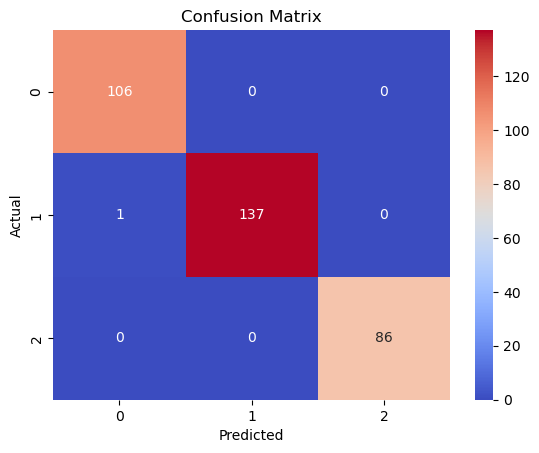

In [48]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[Text(0.4, 0.8333333333333334, 'x[0] <= 1501.0\nentropy = 1.559\nsamples = 670\nvalue = [211.0, 281.0, 178.0]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 211\nvalue = [211, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 3002.5\nentropy = 0.963\nsamples = 459\nvalue = [0, 281, 178]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 281\nvalue = [0, 281, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 178\nvalue = [0, 0, 178]')]

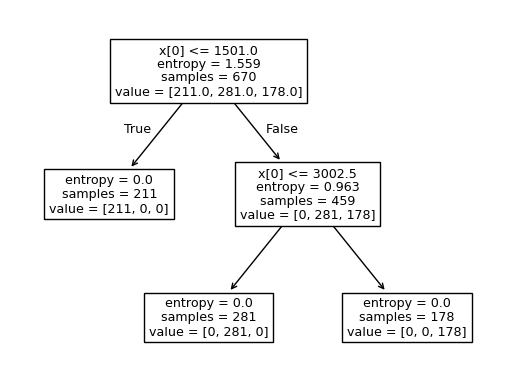

In [49]:
tree.plot_tree(model_tree)

# Linear Regression

In [36]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,Y_train)

LinearRegression()

In [37]:
pred_reg = Lin_reg.predict(X_test)
pred_reg

array([ 6.63981138e-01, -2.97576453e-01,  1.34347211e-01,  2.93891712e+00,
        1.65779712e+00,  2.20700972e+00,  1.58601025e+00,  2.08914629e+00,
        2.49622590e-01,  9.81235597e-01, -3.54575979e-01,  2.69910557e-01,
        1.97534896e-01, -1.14608992e-01,  2.02055364e+00,  2.28990248e+00,
        2.84059016e+00,  1.77737814e+00, -6.47797061e-01,  4.07081587e-01,
        1.18576735e+00,  1.49027132e+00,  1.49403259e+00,  1.85109565e+00,
        2.52572499e+00,  1.53962346e+00, -4.70035827e-01, -8.53318088e-02,
        1.83727595e+00, -2.52480284e-01, -3.35254106e-01,  1.59915981e+00,
        2.80047133e+00,  2.42901997e+00,  2.96724407e+00,  2.45916017e+00,
        2.19859498e+00,  1.35897822e+00, -3.47423295e-01, -4.08021364e-01,
        1.86231302e+00,  1.82114675e+00, -7.69313600e-02,  5.05917514e-01,
        1.95602411e+00,  1.95600983e+00,  1.70878549e+00,  2.18120529e+00,
       -5.00080385e-01,  8.38939726e-01,  2.03293586e+00,  2.21425124e+00,
        6.34466156e-02,  

In [38]:
sc = Lin_reg.score(X_test,Y_test)
sc

0.8062794523562423

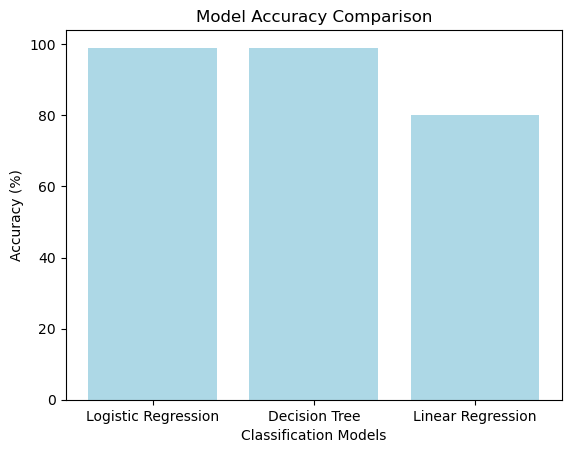

In [50]:
model_names = ['Logistic Regression', 'Decision Tree','Linear Regression']
accuracy_scores = [99, 99, 80]
plt.bar(model_names, accuracy_scores, color='lightblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()